This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 
    
    
 Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

   
    
    
  

------ road map---------

This is a classification problem

make some hypothesis
statistical analysis(mean,median)
visualization
data preprocessing 

model:

logistic regression
LDA
Naive bayes


### import packages

In [40]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### import data

In [41]:
iris_data = pd.read_csv('D:/projects information and files/projects/iris.data.csv',names=['sepal length','sepal width',
                        'petal length','petal width','class'])

In [42]:
iris_data.head()

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [43]:
#### There are no missing values
### statistical analysis

iris_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
list_predictors = ['sepal length','sepal width',
                        'petal length','petal width']

In [45]:
# prarson correlation measures the relation between the variables
p=iris_data[list_predictors].corr()

print(p)
# petal width and petal lenght are highly correlated
# sepal length and sepal width are negatively correlated

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


In [37]:
### converting categorical to numerical



In [38]:
iris_data['class'] = iris_data['class'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':3})

### some visualization

##### single variable sepal lenght

##### data is not normally distributed this can be absorbed in the stats

In [ ]:
plt.hist(iris_data['sepal length'],bins=10,color='pink')
plt.xlabel('sepal lenght')
plt.show()


In [ ]:
plt.hist(iris_data['sepal length'],bins=10,color='pink') plt.xlabel('sepal lenght') plt.show()

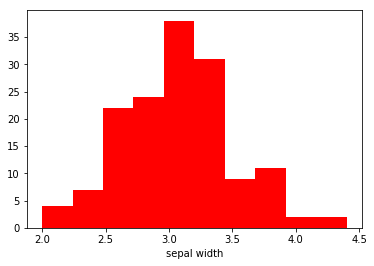

In [9]:
plt.hist(iris_data['sepal width'],color = 'red')
plt.xlabel('sepal width')
plt.show()

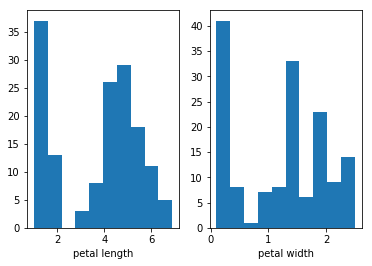

In [10]:


plt.subplot(1,2,1)
plt.hist(iris_data['petal length'])
plt.xlabel('petal length')

plt.subplot(122)
plt.hist(iris_data['petal width'])
plt.xlabel('petal width')

plt.show()


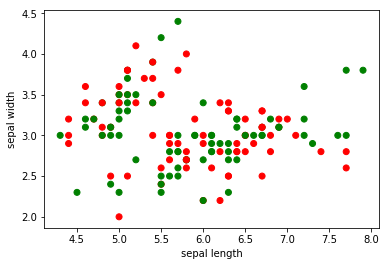

In [11]:


plt.scatter(iris_data['sepal length'],iris_data['sepal width'],color = 'RG')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [12]:
plt.scatter?

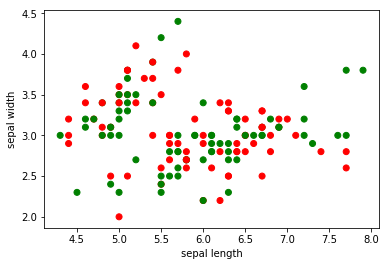

In [13]:
plt.scatter(iris_data['sepal length'],iris_data['sepal width'],color='RG')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

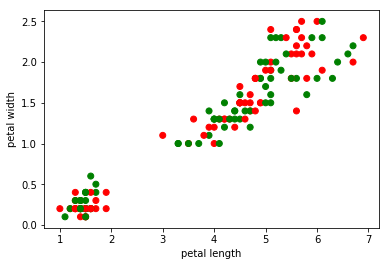

In [14]:
plt.scatter(iris_data['petal length'],iris_data['petal width'],color='RG')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [15]:
#sns.lmplot(x='petal length',y='petal width',fit_reg=False,data=iris_data,hue='class')3

#plt.xlabel('petal length')





In [16]:
sns.countplot(iris_data['class'])

In [17]:
sns.lmplot(x='sepal length',y='sepal width',fit_reg=False,hue='class',data=iris_data)

sns.lmplot(x='petal length',y='petal width',fit_reg=False,hue='class',data=iris_data)

sns.lmplot(x='petal length',y='sepal width',fit_reg=False,hue='class',data=iris_data)

In [18]:
sns.boxplot(data=iris_data)

In [19]:
sns.heatmap(p)

In [20]:
#sns.pairplot(iris_data)

### modeling


LDA :
logistic regression is two class classification problem

LDA : is used for multiple classification problem and calculates the mean and variance of each class and uses bayes probabily


Naive bayes: p(c/x) = p(x/c)*p(c)/p(x)  it assumes that all the variables are important and independent
    
Support vector machine : it forms a hyperplain between the points.


In [46]:
# split the data

from sklearn.cross_validation import train_test_split

In [47]:
x = iris_data.iloc[:,0:4].values

y=iris_data['class'].values

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
clf = LinearDiscriminantAnalysis()

In [25]:
clf.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [26]:
v = clf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix

In [28]:
confu = confusion_matrix(y_true=Y_test,y_pred=v)

In [29]:
confu

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  7]], dtype=int64)

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
NB = GaussianNB()

In [32]:
NB.fit(X_train,Y_train)

GaussianNB(priors=None)

In [33]:
B =  NB.predict(X_test)

In [34]:
conf1 = confusion_matrix(y_true=Y_test,y_pred=B)

In [35]:
print(conf1)

[[11  0  0]
 [ 0 11  1]
 [ 0  0  7]]


In [48]:
# support vectors

from sklearn.svm import SVC

In [52]:
sv = SVC()
sv.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
Y_pred = sv.predict(X_test)

In [56]:
conu = confusion_matrix(Y_test,Y_pred)

In [57]:
conu

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]], dtype=int64)